In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utils import make_grid, draw_n_samples_block_input

from configs import N_SIDE

# Visualise tiles

This notebook creates all the individual tiles we then use to make plots for the paper in Powerpoint.
All plots are saved into respective folders in `\figures\`. Figures can be downloaded as a folder to then fill shapes with the corresponding pictures.

In [2]:
# Turn off to protext RAM
show_bool = False
standard_quiver_scale = 47
branching_quiver_scale = 22

## Defining custom colorscale

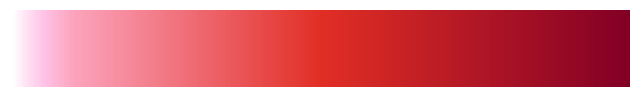

In [ ]:
# pink with high sensitivity
values = np.array([0., 0.05, 0.1, 0.5, 1.])
colors = ["white", "#ffc4e8", "#fca4bd", "#e22f26", "#830025"]
error_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "error_cmap", colors = list(zip(values, colors)))

gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack([gradient] * 20)  # Make it tall enough to see

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = error_cmap)
plt.axis('off')

plt.savefig(f"figures/cmaps/error.png", dpi = 100, bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [4]:
# Import all simulation functions
from simulate import (
    simulate_detailed_branching,
    # simulate_detailed_convergence,
    simulate_detailed_curve,
    simulate_detailed_deflection,
    simulate_detailed_edge,
    simulate_detailed_ridges,
)

# Define simulations as a dictionary with names as keys to function objects
# alphabectic order here
simulations = {
    "branching": simulate_detailed_branching,
    "curve": simulate_detailed_curve,
    "deflection": simulate_detailed_deflection,
    "edge": simulate_detailed_edge,
    "ridges": simulate_detailed_ridges,
}

In [5]:
#############
### TRAIN ###
#############

x_train = torch.load("data/sim_data/x_train_lines_discretised_0to1.pt", weights_only = False).float()

# Storage dictionaries
y_train_dict = {}

# Make y_train_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate training observations with sim_func
    y_train = sim_func(x_train)
    # Store training data in dictionary under sim_name
    y_train_dict[sim_name] = y_train 

############
### TEST ###
############

# Make x_grid
_, x_test = make_grid(n_side = N_SIDE)

# Storage dictionaries
y_test_dict = {}

# Make y_test_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate test observations
    y_test = sim_func(x_test)
    y_test_dict[sim_name] = y_test  # Store test outputs

# Ground truth

In [6]:
x_test = x_test.detach()

for (sim_name, y_train) in y_train_dict.items():

    y_test = y_test_dict[sim_name]

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))

    quiver_scale = standard_quiver_scale
    if sim_name == "branching":
        quiver_scale = branching_quiver_scale
    
    # Plot ground truth test data in black
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], scale = quiver_scale, color = "black")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/gt/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Ground truth + train lines

In [7]:
# Read line segements as pd.DataFrame
line_segments = pd.read_csv("data/line_segments_0to1.csv")

# Convert line segments to torch tensor, ignoring the column headers
line_segments = torch.tensor(line_segments.values)

x_train = x_train.detach()
x_test = x_test.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

for (sim_name, y_train) in y_train_dict.items():

    # Extract training and test vectors
    y_test = y_test_dict[sim_name]

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    
    # Iterate over (9) segements:
    for i in range(0, line_segments.shape[0]):
        ax.plot(
            [line_segments[i, 0], line_segments[i, 1]], # (x_start, x_end)
            [line_segments[i, 2], line_segments[i, 3]], # (y_start, y_end)
            color = train_line_color, alpha = 0.2, linewidth = 4)
    
    # Plot ground truth test data in black
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = test_color, label = "test")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/gt_and_train_lines/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Training vectors

In [8]:
# Read line segements as pd.DataFrame
line_segments = pd.read_csv("data/line_segments_0to1.csv")

# Convert line segments to torch tensor, ignoring the column headers
line_segments = torch.tensor(line_segments.values)

x_train = x_train.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

for (sim_name, y_train) in y_train_dict.items():

    # Extract training and test vectors
    y_train = y_train_dict[sim_name]

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))

    quiver_scale = standard_quiver_scale
    if sim_name == "branching":
        quiver_scale = branching_quiver_scale
    
    # Plot ground truth test data in black
    ax.quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], scale = quiver_scale, color = test_color, label = "test")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/train_data/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Errors

Plot and save

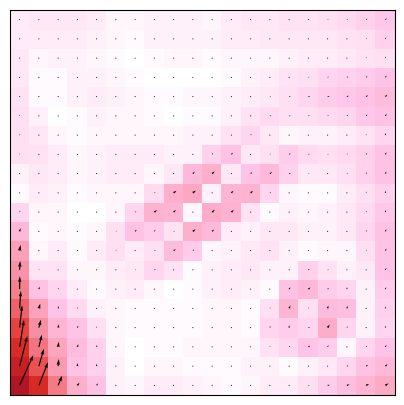

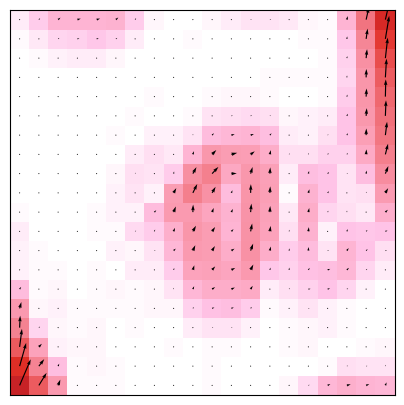

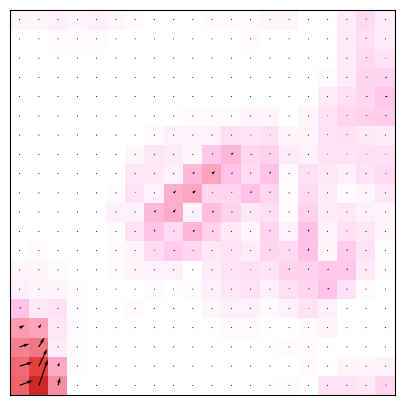

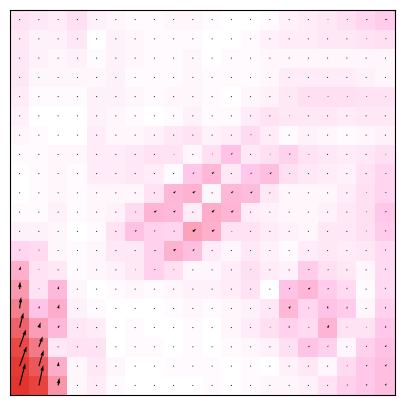

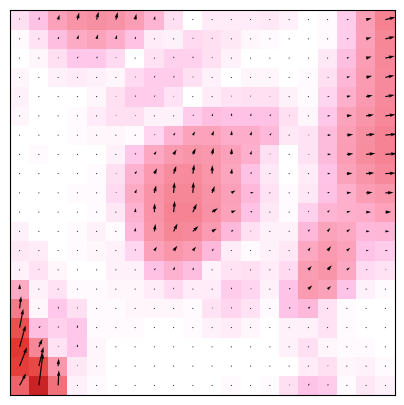

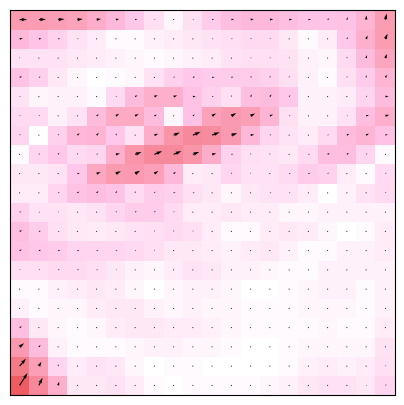

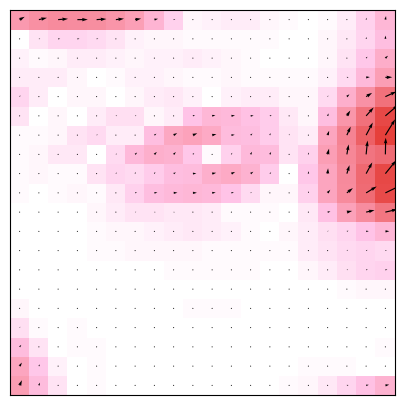

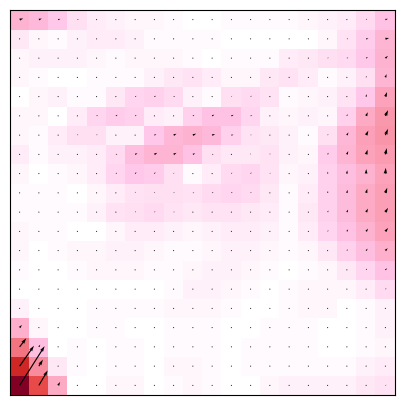

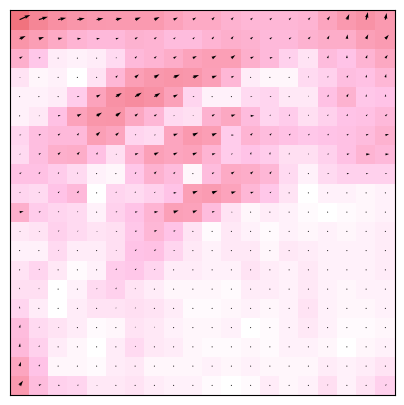

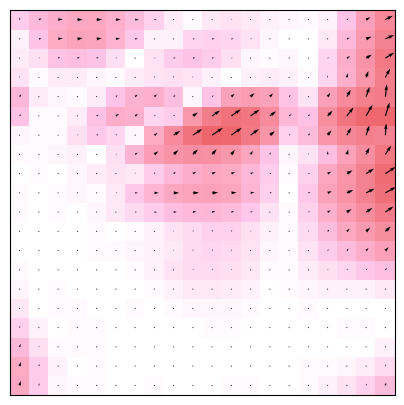

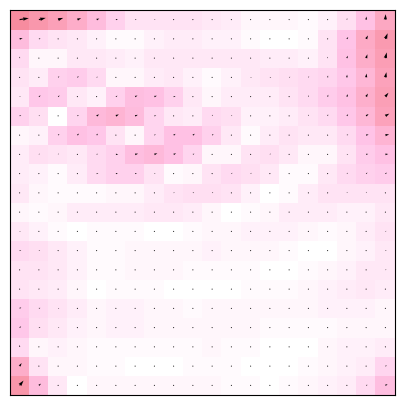

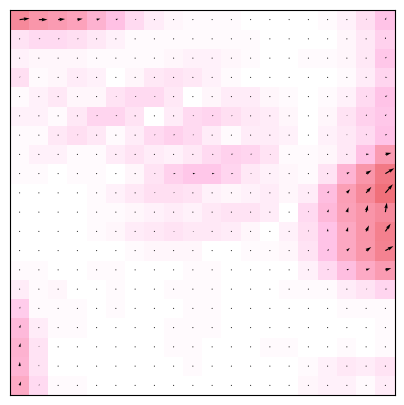

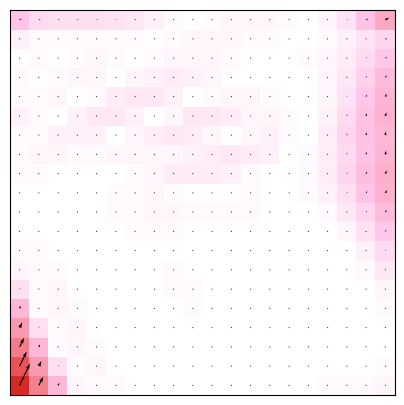

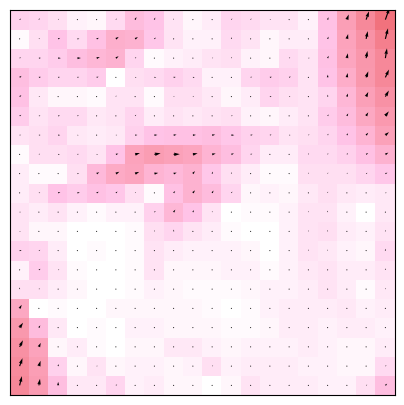

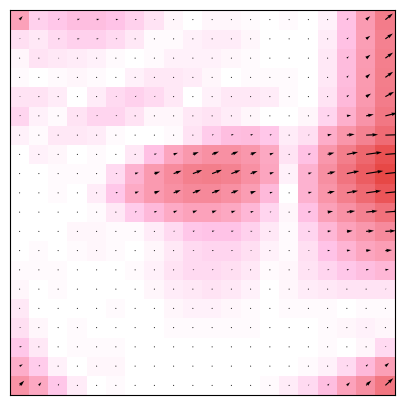

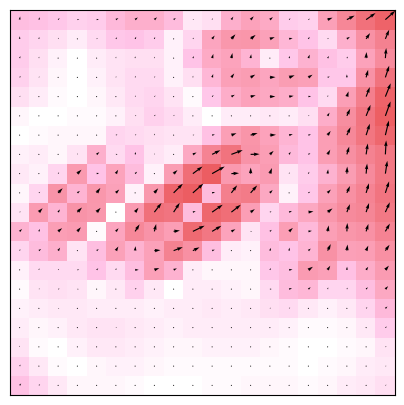

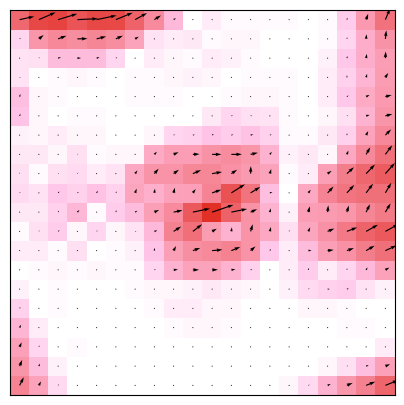

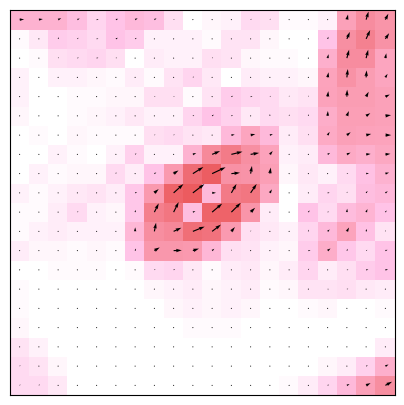

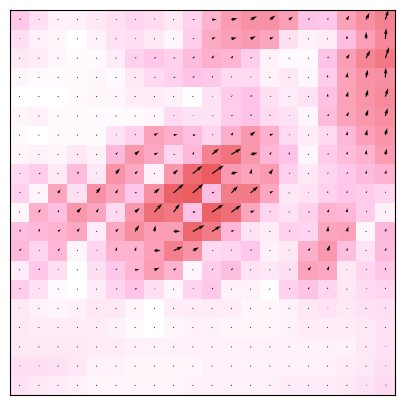

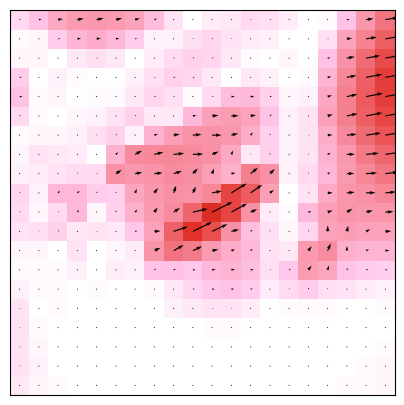

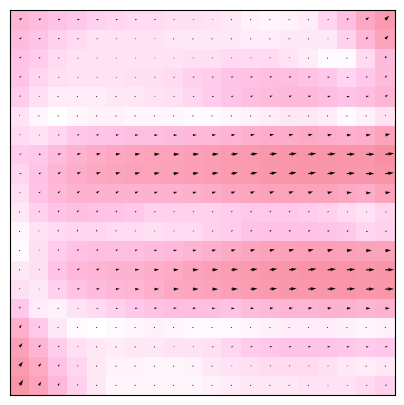

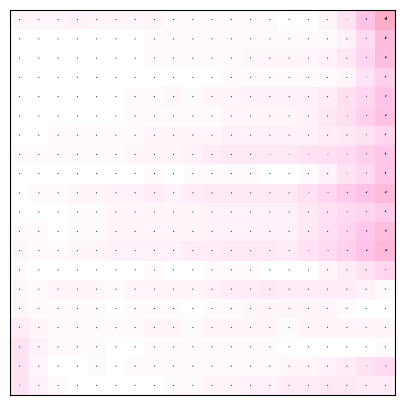

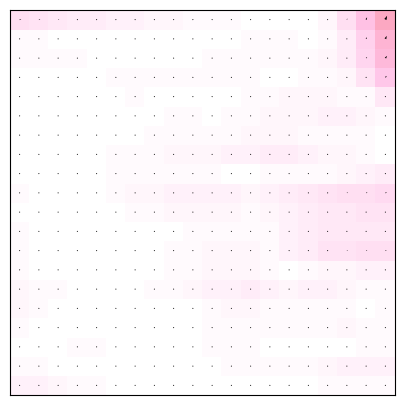

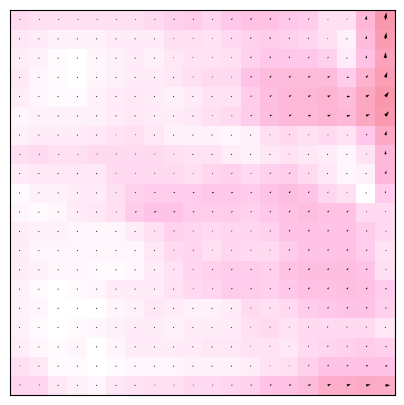

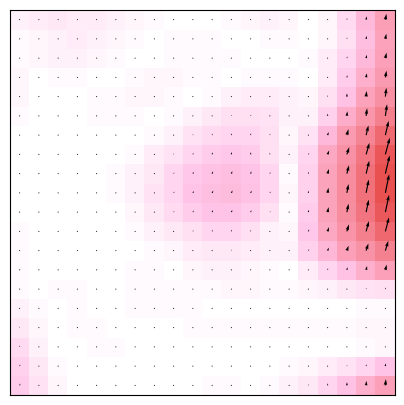

In [9]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["dfNN", "dfGP", "dfNGP", "PINN", "GP"]:
        if model_name in ["dfGP", "dfNGP", "GP"]:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_predictions.pt"

        pred = torch.load(path, weights_only = False).detach().cpu()
        error = torch.abs(pred - y_test) # shape: (N_SIDE^2, 2)
        
        # error over both dims for background color
        error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE)

        U = error[:, 0].reshape(N_SIDE, N_SIDE)  # x-component
        V = error[:, 1].reshape(N_SIDE, N_SIDE)  # y-component

        # Plot
        plt.figure(figsize = (5, 5))
        pc = plt.pcolor(X, Y, error_magnitude.detach().numpy(), cmap = error_cmap, shading = "auto", vmax = 3.0) # fixed vmax for consistency
        plt.quiver(X, Y, U, V, scale = 20, color = "black") # fixed scale for consistency
        # plt.colorbar(pc, label = "Error magnitude")
        # plt.title("Error Field with Quiver Overlay")

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/errors/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()

        plt.show()
        plt.close()

# Predictions

In [10]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["dfNN", "dfGP", "dfNGP", "PINN", "GP"]:
        if model_name in ["dfGP", "dfNGP", "GP"]:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_predictions.pt"

        pred = torch.load(path, weights_only = False).detach().cpu()

        U = pred[:, 0].reshape(N_SIDE, N_SIDE)  # x-component
        V = pred[:, 1].reshape(N_SIDE, N_SIDE)  # y-component

        # Plot
        plt.figure(figsize = (5, 5))

        quiver_scale = standard_quiver_scale
        if sim_name == "branching":
            quiver_scale = branching_quiver_scale

        plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/predictions/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

# Predictions with errors

In [11]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["dfNN", "dfGP", "dfNGP", "PINN", "GP"]:
        if model_name in ["dfGP", "dfNGP", "GP"]:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_predictions.pt"

        pred = torch.load(path, weights_only = False).detach().cpu()
        error = torch.abs(pred - y_test) # shape: (N_SIDE^2, 2)
        
        # error over both dims for background color
        error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE)

        # quivers are preds now
        U = pred[:, 0].reshape(N_SIDE, N_SIDE)  # x-component
        V = pred[:, 1].reshape(N_SIDE, N_SIDE)  # y-component

        # Plot
        plt.figure(figsize = (5, 5))
        pc = plt.pcolor(X, Y, error_magnitude.detach().numpy(), cmap = error_cmap, shading = "auto", vmax = 3.0) # fixed vmax for consistency
        quiver_scale = standard_quiver_scale
        if sim_name == "branching":
            quiver_scale = branching_quiver_scale

        plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency
        # plt.colorbar(pc, label = "Error magnitude")
        # plt.title("Error Field with Quiver Overlay")

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/predictions_with_errors/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

# Plot ground truth with same quiver scale

In [12]:
# Read line segements as pd.DataFrame
line_segments = pd.read_csv("data/line_segments_0to1.csv")
# print(line_segments)

# Convert line segments to torch tensor, ignoring the column headers
line_segments = torch.tensor(line_segments.values).detach()
x_test = x_test.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

for (sim_name, y_train) in y_train_dict.items():

    # Extract training and test vectors
    y_test = y_test_dict[sim_name].detach()

    fig, ax = plt.subplots(1, 1, figsize = (3, 3))
    
    # Iterate over (9) segements:
    for i in range(0, line_segments.shape[0]):
        ax.plot(
            [line_segments[i, 0], line_segments[i, 1]], # (x_start, x_end)
            [line_segments[i, 2], line_segments[i, 3]], # (y_start, y_end)
            color = train_line_color, alpha = 0.2, linewidth = 4)
    
    # Plot ground truth test data in black
    quiver_scale = standard_quiver_scale
    if sim_name == "branching":
        quiver_scale = branching_quiver_scale
        
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], scale = quiver_scale, color = test_color, label = "test")

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/predictions/gt_same_quiverscale/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Divergence

In [1]:
values = np.array([0.0, 0.5, 1.])
colors = ["red", "white", "blue"]
div_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "red_white_blue", colors = list(zip(values, colors)))

gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack([gradient] * 20)  # Make it tall enough to see

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = div_cmap)
plt.axis('off')

plt.savefig(f"figures/cmaps/div.png", dpi = 100, bbox_inches = 'tight', pad_inches = 0)

plt.show()

NameError: name 'np' is not defined

In [14]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["GP", "PINN", "dfGP", "dfNGP"]: # "dfNN", 
        path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_prediction_divergence_field.pt"

        div = torch.load(path, weights_only = False).detach().cpu().reshape(N_SIDE, N_SIDE)

        # Plot
        plt.figure(figsize = (5, 5))
        mag = 5.0
        plt.pcolormesh(div, cmap = div_cmap, vmin = - mag, vmax = mag) # fixed scale for consistency

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/divergence/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

# Covariance and posterior samples

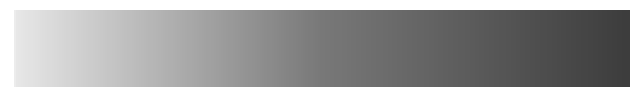

In [ ]:
# Make var_cmap 
values = np.array([0.0, 0.005, 0.5, 1.0])
colors = ["white", "#e8e8e8", "#797979", "#3d3d3d"]
var_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "var_cmap", colors = list(zip(values, colors)))

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = var_cmap)
plt.axis('off')
plt.savefig(f"figures/cmaps/var.png", dpi = 100, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [16]:
def reshape_covar_block_to_interleaved(covar_block):
    """
    Reshape covariance block to interleaved format.
    """
    # Get the shape of the covariance block
    N_ALL = int(covar_block.shape[0] / 2)

    ### Reshape covar ###
    # extract all 4 blocks (big blocks)
    covar_uu = covar_block[:N_ALL, :N_ALL]
    covar_uv = covar_block[:N_ALL, N_ALL:]
    covar_vu = covar_block[N_ALL:, :N_ALL]
    covar_vv = covar_block[N_ALL:, N_ALL:]

    mini_blocks = torch.stack([
                torch.stack([covar_uu, covar_uv], dim = -1), # same as dim = 2, torch.Size([400, 400, 2])
                torch.stack([covar_vu, covar_vv], dim = -1) # torch.Size([400, 400, 2])
            ], dim = -1) # same as dim = 3, torch.Size([400, 400, 2, 2])
        
    # for N_ALL = 400
    mini_blocks = mini_blocks.permute(0, 2, 1, 3)  # [400, 2, 400, 2]

    # Combine first 2 dims into one and last two dims into one
    covar_interleave = mini_blocks.reshape(N_ALL * 2, N_ALL * 2)
    
    return covar_interleave

In [21]:
show_bool = True

In [ ]:
simulations.items()

TypeError: 'dict_items' object is not subscriptable

# No reshape

Processing curve with GP...
Jitter: 9.999999999999999e-06


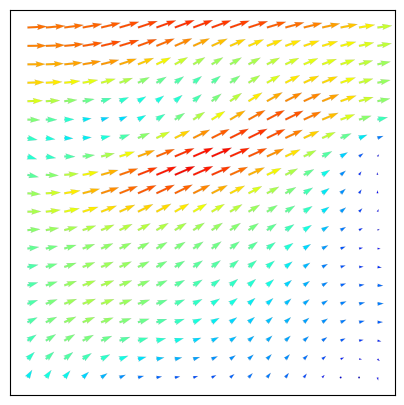

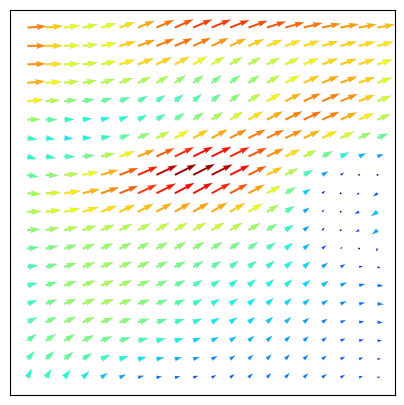

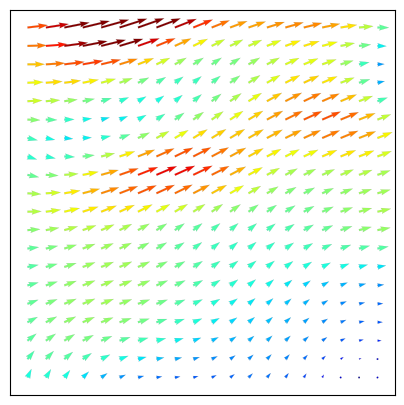

Processing curve with dfGP...
Emergency Jitter: 1e-06


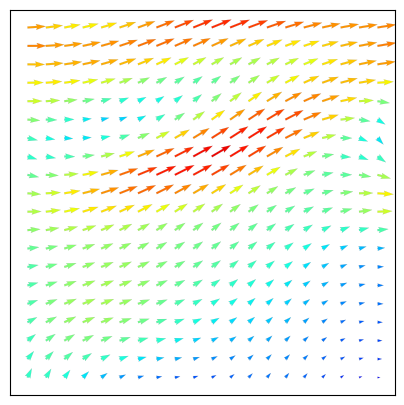

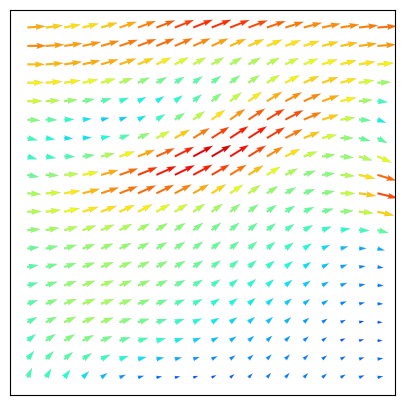

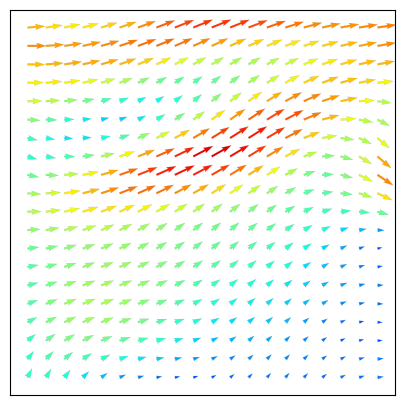

Processing curve with dfNGP...
Jitter: 0.01


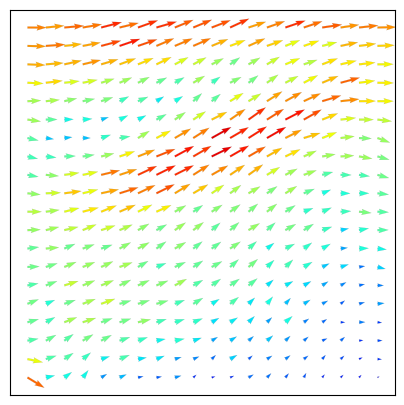

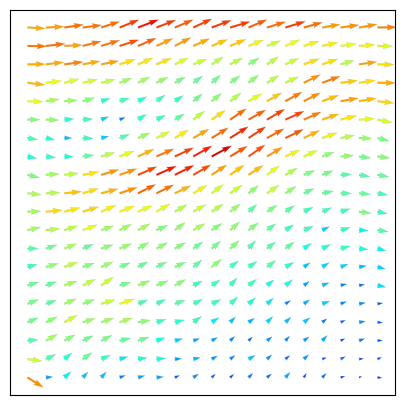

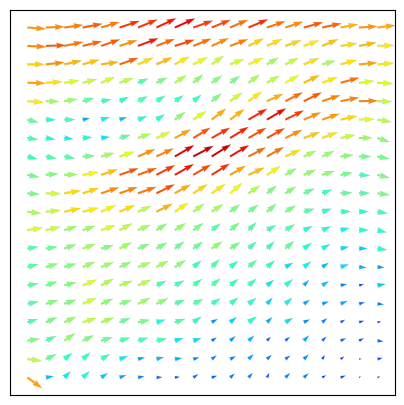

In [60]:
# 5 sims x 5 models = 25
# for sim_name, sim_func in simulations.items():
sim_name = "curve"

# Extract gt
y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

for model_name in ["GP", "dfGP", "dfNGP"]: # "dfNN",
    print(f"Processing {sim_name} with {model_name}...") 
    mean_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
    covar_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_covar_predictions.pt"

    mean = torch.load(mean_path, weights_only = False).detach().cpu()
    covar = torch.load(covar_path, weights_only = False).detach().cpu()

    # covar_interleave = reshape_covar_block_to_interleaved(covar)

    n_samples = 3
    n_sample_tensor = draw_n_samples_block_input(mean, covar, n_samples, max_jitter = 1e-1)

    ### Uncertainty ###
    var = torch.diag(covar)[:(N_SIDE * N_SIDE)].reshape(N_SIDE, N_SIDE) + torch.diag(covar)[(N_SIDE * N_SIDE):].reshape(N_SIDE, N_SIDE)

    n_sample_tensor_speed = torch.sqrt(n_sample_tensor[:, :, :, 0]**2 + n_sample_tensor[:, :, :, 1]**2) 

    ### Samples ###
    for i in range(n_samples):
        sample = n_sample_tensor[i]

        sample_speed = n_sample_tensor_speed[i]

        U = sample[:, :, 0]
        V = sample[:, :, 1]

        plt.figure(figsize = (5, 5))

        ### Plot samples ###

        # background color
        # plt.pcolor(X, Y, sample_speed.detach().numpy(), cmap = "jet", vmin = 0, vmax = 3.0, alpha = 0.5)

        quiver_scale = standard_quiver_scale
        if sim_name == "branching":
            quiver_scale = branching_quiver_scale
        plt.quiver(X, Y, U, V, sample_speed, scale = quiver_scale, cmap = "jet", clim = (0.0, 3.0), 
                   linewidth = 0.08, width = 0.005, edgecolor = "gray") # fixed scale for consistency # width makes it fat

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/samples_speedcolor/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

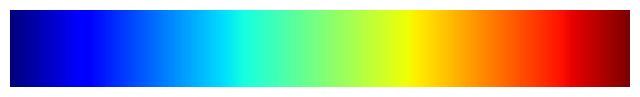

In [63]:
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack([gradient] * 20)  # Make it tall enough to see

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = "jet")
plt.axis('off')

plt.savefig(f"figures/cmaps/jet.png", dpi = 100, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [17]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["GP", "dfGP", "dfNGP"]: # "dfNN", 
        mean_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        covar_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_covar_predictions.pt"

        mean = torch.load(mean_path, weights_only = False).detach().cpu()
        covar = torch.load(covar_path, weights_only = False).detach().cpu()

        covar_interleave = reshape_covar_block_to_interleaved(covar)

        print(f"Symmetrie: {model_name} - {sim_name}", torch.allclose(covar, covar.T, atol = 1e-6))
        print(f"Symmetrie il: {model_name} - {sim_name}", torch.allclose(covar_interleave, covar_interleave.T, atol = 1e-6))
        eigvals = torch.linalg.eigvalsh(covar)
        eigvals_il = torch.linalg.eigvalsh(covar_interleave)
        print(f"Min eigenval: {model_name} - {sim_name}", eigvals.min().item())
        print(f"Min eigenval il: {model_name} - {sim_name}", eigvals_il.min().item())

        n_samples = 3
        n_sample_tensor = draw_n_samples_block_input(mean, covar, n_samples, max_jitter = 1e-1)

        ### Uncertainty ###
        var = torch.diag(covar)[:(N_SIDE * N_SIDE)].reshape(N_SIDE, N_SIDE) + torch.diag(covar)[(N_SIDE * N_SIDE):].reshape(N_SIDE, N_SIDE)

        ### Samples ###
        for i in range(n_samples):
            sample = n_sample_tensor[i]

            U = sample[:, :, 0]
            V = sample[:, :, 1]

            plt.figure(figsize = (5, 5))

            ### Plot samples ###
            quiver_scale = standard_quiver_scale
            if sim_name == "branching":
                quiver_scale = branching_quiver_scale
            plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

            plt.gca().set_aspect('equal')
            plt.gca().set_xticks([])
            plt.gca().set_yticks([])

            plt.savefig(f"figures/samples/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

            if show_bool:
                plt.show()
            plt.close()
 
            ### Plot samples with error ###
            error = torch.abs(sample.reshape(-1, 2) - y_test) # shape: (N_SIDE^2, 2)
        
            # error over both dims for background color
            error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE)

            plt.figure(figsize = (5, 5))

            plt.pcolor(X, Y, error_magnitude, cmap = error_cmap, shading = "auto", vmax = 3.0)

            quiver_scale = standard_quiver_scale
            if sim_name == "branching":
                quiver_scale = branching_quiver_scale
            
            plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

            plt.gca().set_aspect('equal')
            plt.gca().set_xticks([])
            plt.gca().set_yticks([])

            plt.savefig(f"figures/samples_with_error/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

            if show_bool:
                plt.show()
            plt.close()

            ### Plot samples with uncertainty ###

            plt.figure(figsize = (5, 5))

            mag = 0.3 # increase so it does not saturate
            plt.pcolormesh(X, Y, var, cmap = var_cmap, vmax = mag)
            quiver_scale = standard_quiver_scale
            if sim_name == "branching":
                quiver_scale = branching_quiver_scale

            plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

            plt.gca().set_aspect('equal')
            plt.gca().set_xticks([])
            plt.gca().set_yticks([])

            plt.savefig(f"figures/samples_with_uncertainty/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

            if show_bool:
                plt.show()
            plt.close()

        ### Plot variance i.e. uncertainty only ###
        plt.figure(figsize = (5, 5))
        mag = 0.3 # increase so it does not saturate
        plt.pcolormesh(var, cmap = var_cmap, vmax = mag) # fixed scale for consistency, cmap = var_cmap

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/variance/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

Symmetrie: GP - branching True
Symmetrie il: GP - branching True
Min eigenval: GP - branching -8.093657584140601e-07
Min eigenval il: GP - branching -8.093013548204908e-07
Jitter: 1e-06
Symmetrie: dfGP - branching True
Symmetrie il: dfGP - branching True
Min eigenval: dfGP - branching -5.295267328619957e-06
Min eigenval il: dfGP - branching -1.5254905223846436
Emergency Jitter: 9.999999999999999e-06


/home/kim/ice_thickness/utils.py:148: UserWarning: Failed to make matrix positive definite. Trying work around
  warnings.warn("Failed to make matrix positive definite. Trying work around")


Symmetrie: dfNGP - branching True
Symmetrie il: dfNGP - branching True
Min eigenval: dfNGP - branching -4.503604245087445e-08
Min eigenval il: dfNGP - branching -0.08235399425029755
Jitter: 0.1
Symmetrie: GP - curve True
Symmetrie il: GP - curve True
Min eigenval: GP - curve -5.0276498768653255e-06
Min eigenval il: GP - curve -5.0383682719257195e-06
Jitter: 9.999999999999999e-06
Symmetrie: dfGP - curve True
Symmetrie il: dfGP - curve True
Min eigenval: dfGP - curve -1.8884191376855597e-05
Min eigenval il: dfGP - curve -0.54853755235672
Emergency Jitter: 1e-06
Symmetrie: dfNGP - curve True
Symmetrie il: dfNGP - curve True
Min eigenval: dfNGP - curve -1.8993605408468284e-06
Min eigenval il: dfNGP - curve -0.0032521605025976896
Jitter: 0.01
Symmetrie: GP - deflection True
Symmetrie il: GP - deflection True
Min eigenval: GP - deflection -7.785905836499296e-06
Min eigenval il: GP - deflection -7.783641194691882e-06
Jitter: 9.999999999999999e-06
Symmetrie: dfGP - deflection True
Symmetrie il

# Plot mini illustrative kernel matrix 

We plot the output from the div-free kernel for the model_vis for 4 x 4 points.

In [ ]:
from kernels import divergence_free_se_kernel

# Define some random hypers here
hp_list = [torch.tensor(0.1), torch.tensor(0.1), torch.tensor([0.1, 0.12])]
kerny = divergence_free_se_kernel(x_train[0:4], x_train[0:4], hyperparameters = hp_list)

plt.figure(figsize = (5, 5))
plt.imshow(kerny.detach().numpy(), cmap = "grey", vmin = -0.5, vmax = 1.0)
plt.gca().set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig(f"figures/illustrate_covar/mini_covar_matrix.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)
plt.close()